# Lecture Noets of Probabilistic Robotics: Chapter2

[詳解 確率ロボティクス][amazon]の本の写経です。
参考資料としては著者の下記GitHubがあります。

- [ryuichiueda/LNPR_BOOK_CODES][book_codes]
- [ryuichiueda/LNPR][codes]
- [ryuichiueda/LNPR_SLIDES][slides]

[amazon]: https://www.amazon.co.jp/dp/4065170060
[book_codes]: https://github.com/ryuichiueda/LNPR_BOOK_CODES
[codes]: https://github.com/ryuichiueda/LNPR
[slides]: https://github.com/ryuichiueda/LNPR_SLIDES

# Preset

In [1]:
# default packagse
import logging
import pathlib
from enum import Enum
from typing import Optional

In [2]:
# third party packages
import IPython.display as display
import matplotlib.pyplot as plt
import pandas as pd
import requests
import seaborn as sns

In [3]:
# logger
_logger = logging.getLogger(__name__)
logging.basicConfig(level=logging.INFO)

In [4]:
sns.set()

# 2.1 Prepare data　

In [5]:
class SensorColumns(Enum):
    """センサデータの列名一覧."""
    DATE: str = "date"
    TIME: str = "time"
    IR: str = "ir"
    LIDAR: str = "lidar"

In [6]:
def download_sensor_data_200() -> pathlib.Path:
    """センサデータ200をネットからダウンロードしファイルとして保存."""
    filepath = pathlib.Path("sensor_data_200.txt")
    url = "https://github.com/ryuichiueda/LNPR_BOOK_CODES/raw/master/sensor_data/sensor_data_200.txt"

    r = requests.get(url, allow_redirects=True)
    with open(str(filepath), "wb") as f:
        f.write(r.content)

    return filepath


FILEPATH_SENSOR_200 = download_sensor_data_200()

In [7]:
def read_sensor_file(filepath: pathlib.Path) -> pd.DataFrame:
    """センサデータをファイルから読み込む."""
    df = pd.read_csv(
        filepath,
        delimiter=" ",
        header=None,
        names=[
            SensorColumns.DATE.value,
            SensorColumns.TIME.value,
            SensorColumns.IR.value,
            SensorColumns.LIDAR.value,
        ],
        parse_dates=[SensorColumns.DATE.value],
    )

    return df


DF_SENSOR_200 = read_sensor_file(FILEPATH_SENSOR_200)
DF_SENSOR_200

,date,time,ir,lidar
0,2018-01-22,95819,305,214
1,2018-01-22,95822,299,211
2,2018-01-22,95826,292,199
3,2018-01-22,95829,321,208
4,2018-01-22,95832,298,212
...,...,...,...,...
58983,2018-01-24,120023,313,208
58984,2018-01-24,120026,297,200
58985,2018-01-24,120030,323,204
58986,2018-01-24,120033,326,207


# 2.2 度数分布と確率分布

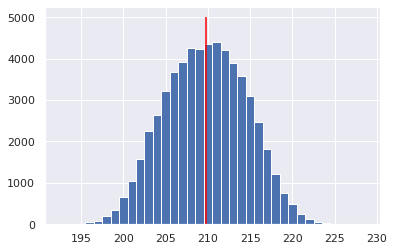

INFO:__main__:mean: 209.73713297619855
INFO:__main__:variance: 23.40810659855441
INFO:__main__:std dev: 4.83819249292072


In [8]:
def show_histogram(df: pd.DataFrame) -> None:
    """ヒストグラムを描画し、LIDARデータの分布を確認."""
    col = SensorColumns.LIDAR.value
    val_max = df[col].max()
    val_min = df[col].min()
    val_mean = df[col].mean()
    bins = val_max - val_min

    df[col].hist(bins=bins, align="left")
    plt.vlines(val_mean, ymin=0, ymax=5000, color="red")
    plt.show()

    val_var = df[col].var()
    val_std = df[col].std()
    _logger.info(f"mean: {val_mean}")
    _logger.info(f"variance: {val_var}")
    _logger.info(f"std dev: {val_std}")


show_histogram(DF_SENSOR_200)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


,211,210,208,209,212,207,213,206,214,205,215,204,216,203,217,202,218,201,219,200,220,199,221,198,222,197,196,223,224,226,195,194,193,227,229
lidar,4409.000000,4355.000000,4261.000000,4228.000000,4201.000000,3920.000000,3897.000000,3674.000000,3572.000000,3225.000000,3108.000000,2638.000000,2459.000000,2252.000000,1812.000000,1584.000000,1224.00000,1053.000000,749.000000,668.000000,486.000000,353.000000,252.000000,205.000000,127.000000,84.000000,59.000,55.000000,32.000000,15.000000,13.00000,10.00000,4.000000,3.000000,1.000000
probs,0.074744,0.073829,0.072235,0.071676,0.071218,0.066454,0.066064,0.062284,0.060555,0.054672,0.052689,0.044721,0.041686,0.038177,0.030718,0.026853,0.02075,0.017851,0.012697,0.011324,0.008239,0.005984,0.004272,0.003475,0.002153,0.001424,0.001,0.000932,0.000542,0.000254,0.00022,0.00017,0.000068,0.000051,0.000017


INFO:__main__:sum: 1.0


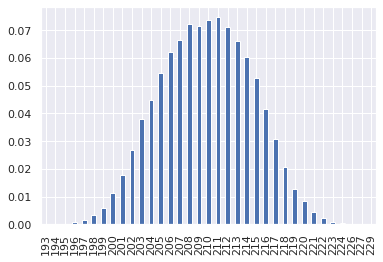

In [9]:
def show_probability(df: pd.DataFrame) -> pd.DataFrame:
    """確率分布に変換して確認."""
    col = SensorColumns.LIDAR.value
    col_probs = "probs"
    df_freqs = pd.DataFrame(df[col].value_counts())
    df_freqs[col_probs] = df_freqs[col] / len(df[col])

    display.display(df_freqs.T)
    _logger.info(f"sum: {df_freqs[col_probs].sum()}")

    df_freqs[col_probs].sort_index().plot.bar()
    plt.show()

    return df_freqs


DF_FREQS = show_probability(DF_SENSOR_200)

In [10]:
def drawing(df: pd.DataFrame, num: int = 1, random_state: Optional[int] = None) -> None:
    """算出済みの確率分布に基づいてデータを一つ返す."""
    df_sample = df.sample(n=num, weights="probs", random_state=random_state, replace=True)

    return df_sample.index.tolist()


_logger.info(f"sampling: {drawing(DF_FREQS, num=1, random_state=0)[0]}")

INFO:__main__:sampling: 206


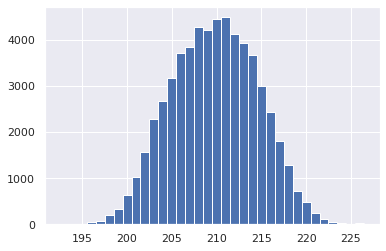

In [11]:
def show_hist_by_drawing(df: pd.DataFrame, num_samples: int = 100) -> None:
    """算出済みの確率分布に基づいてデータをドローして分布を出力."""
    col = "lidar"
    samples = drawing(df, num=num_samples, random_state=0)
    df_simulated = pd.DataFrame(
        samples,
        columns=[col],
    )

    p = df_simulated[col]
    bins = p.max() - p.min()
    p.hist(bins=bins, align="left")
    plt.show()


show_hist_by_drawing(DF_FREQS, num_samples=len(DF_SENSOR_200))